# <center> Problem_2 </center>

<center>**Dataset Description**</center> The data set is derived from a two-year usage log of a Washington, D.C. bikesharing
system called Captial Bike Sharing (CBS). Bike sharing systems are variants of traditional
bicycle rentals, where the process of renting and returning is heavily automated; typically, bikes can
be rented at one location and returned at another without ever having to deal with a human being.
The goal is to predict the daily level of bicycle rentals from environmental and seasonal variables
using decision trees.

In [32]:
import numpy as np   # linear algebra computation
import pandas as pd  # for reading csv file
from sklearn.metrics import mean_squared_error as mse   # for calculating mean square error
%matplotlib inline
import matplotlib.pyplot as plt

Files available in **P2_data**

In [33]:
from subprocess import check_output
print(check_output(['ls','/home/kk/Desktop/Assignment_2/P2_data/']).decode('utf8'))

bikes.csv



csv file is read in **bikes**

In [34]:
bikes = pd.read_csv('P2_data/bikes.csv')
bikes.head()   # displaying first 5 rows

date  season  year  month  holiday  weekday  workingday  weather  \
0  2011-01-01       1     0      1        0        6           0        2   
1  2011-01-02       1     0      1        0        0           0        2   
2  2011-01-03       1     0      1        0        1           1        1   
3  2011-01-04       1     0      1        0        2           1        1   
4  2011-01-05       1     0      1        0        3           1        1   

       temp  humidity  windspeed  count  
0  0.344167  0.805833   0.160446    985  
1  0.363478  0.696087   0.248539    801  
2  0.196364  0.437273   0.248309   1349  
3  0.200000  0.590435   0.160296   1562  
4  0.226957  0.436957   0.186900   1600

In [35]:
bikes.info()   # information about the featues present in bikes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
date          731 non-null object
season        731 non-null int64
year          731 non-null int64
month         731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weather       731 non-null int64
temp          731 non-null float64
humidity      731 non-null float64
windspeed     731 non-null float64
count         731 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 68.6+ KB


Excluding `date` and `count` columns from `bikes` Dataframe and storing it into **bikes_train**.<br>
And storing `class` column in **bikes_label**.

In [36]:
bikes_train = bikes.drop(['date','count'],axis=1)
bikes_label = bikes['count']

**Data**: `bikes.csv` has the following attributes:
    * date: The full date, in year-month-day format.
    * season: Season of the year, 1 to 4
    * year: Year, 0=2011, 1=2012
    * month: Month (1 to 12)
    * holiday: Whether the day is holiday or not
    * weekday: Day of the week (coded by 0-6)
    * workingday: 1 for working days, 0 for weekends and holidays
    * weather: Weather, coded as follows:
        * 1. Clear to partly cloudy
        * 2. Mist but no heavier precipitation
        * 3. Light rain or snow, possibly with thunder
        * 4. Heavy rain or snow
    * temp: Normalized temperature in Celsius. The values are derived via (t − tmin)/(tmax − tmin); tmin = −8, tmax = +39.
    * humidity: Normalized humidity ( actual humidity divided by 100 ).
    * windspeed: Normalized wind speed ( actual wind speed in miles per hour divided by 67 ).
    * count: Count of total bike rentals that day, including both casual and registered users.

`bikes_label` is a Series storing the count attribute.

In [37]:
bikes_label.head()    # Displaying first five rows

0     985
1     801
2    1349
3    1562
4    1600
Name: count, dtype: int64

In [38]:
bikes_train.head()    # Displaying first five rows

season  year  month  holiday  weekday  workingday  weather      temp  \
0       1     0      1        0        6           0        2  0.344167   
1       1     0      1        0        0           0        2  0.363478   
2       1     0      1        0        1           1        1  0.196364   
3       1     0      1        0        2           1        1  0.200000   
4       1     0      1        0        3           1        1  0.226957   

   humidity  windspeed  
0  0.805833   0.160446  
1  0.696087   0.248539  
2  0.437273   0.248309  
3  0.590435   0.160296  
4  0.436957   0.186900

In [55]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
regressor = DecisionTreeRegressor(criterion='mse', max_depth=15, random_state = 50)

Making use of `export_graphviz` to write learnt Decision tree to `out` file i.e **regression_tree.dot**.

In [56]:
from sklearn.tree import export_graphviz
regression_tree = regressor.fit(bikes_train,bikes_label)
export_graphviz(regression_tree,out_file='regression_tree.dot')

Converting dot file to image `png` format.

In [57]:
regression_tree.tree_.max_depth

15

** I chose max_depth as 15.** ans **MSE** corresponding to different **max_depth** are as follows.<br>
max_depth = 21: MSE = 0.0<br>
max_depth = 20: MSE = 0.36183310533515733<br>
max_depth = 19: MSE = 1.8577291381668946 <br>
max_depth = 18: MSE = 13.349179206566347 <br>
max_depth = 17: MSE = 109.10768353853169 <br>
max_depth = 16: MSE = 454.30984952120383 <br>
max_depth = 15: MSE = 1934.0689091915835 <br>
max_depth = 14: MSE = 5268.2268830728481 <br>
max_depth = 13: MSE = 11797.390516991749 <br>
max_depth = 12: MSE = 20114.328174299979 <br>
max_depth = 11: MSE = 36132.737296511295 <br>
max_depth = 10: MSE = 57148.480742133688

In [58]:
print(check_output(['dot','-Tpng','regression_tree.dot', '-o', 'regression_tree.png']).decode('utf8'))

### <center> (i)(a) Plotting of regression tree </center>

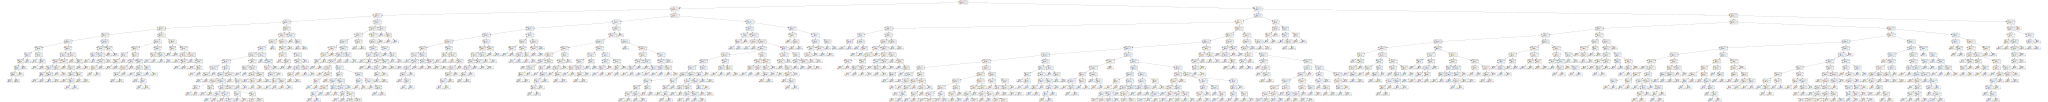

In [59]:
import graphviz  # for plotting the decision tree
tree = export_graphviz(regression_tree,out_file=None)
graphviz.Source(tree)

### <center> (b)The total number of leaf nodes in the tree </center>

**Function to print the leaf_nodes in a tree**

In [60]:
def leaf_nodes(tree):
    total_nodes = tree.tree_.node_count
    left_children = tree.tree_.children_left
    right_children = tree.tree_.children_right

    features_as_leaves = np.zeros(shape=total_nodes, dtype=bool)
    stack = [(0, -1)]  # seed is the root node id and its parent depth
    no_of_leaves=0
    while len(stack) > 0:
        node_id, parent_depth = stack.pop()

        # If we have a test node
        if (left_children[node_id] != right_children[node_id]):
            stack.append((left_children[node_id], parent_depth + 1))
            stack.append((right_children[node_id], parent_depth + 1))
        else:
            features_as_leaves[node_id] = True
            no_of_leaves = no_of_leaves + 1
    return no_of_leaves

In [61]:
print("Total no of leaf nodes are : {}".format(leaf_nodes(regression_tree)))

Total no of leaf nodes are : 651


As we see total number of leaf nodes are **651** taking maximum depth as 15..

### (d) Following variables appear in the tree.
    * season
    * year
    * month
    * holiday
    * weekday
    * workingday
    * weather
    * temp
    * humidity
    * windspeed

### (e) 
As we can see below **temp** variable is more important followed by **year** and then **humidity** and **season**.<br>
And **workingday** and **holiday** are least important.

In [62]:
bikes_train.columns  # columns available in bikes_train

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weather', 'temp', 'humidity', 'windspeed'],
      dtype='object')

Importance of particular column as feature. After seeing the array  we can observe **index- 7**, **index-1** are <br>more important than others with index starting from 0. 

In [63]:
regression_tree.feature_importances_

array([ 0.07558607,  0.2922807 ,  0.03479876,  0.00380683,  0.02077888,
        0.00494992,  0.01595852,  0.44088523,  0.07669368,  0.0342614 ])

### (f) MSE

In [64]:
print("Mean Square Error is: {}".format(mse(regression_tree.predict(bikes_train),bikes_label)))

Mean Square Error is: 1934.0689091915835


In [65]:
print("Total number of nodes are: {}".format(regression_tree.tree_.node_count))

Total number of nodes are: 1301


## (Q)(ii)
Now re-code the months so that January and February share one code, May through October
shares another, and March, April, November and December share a third. Re-estimate the regression
tree. How does the tree change (if at all)? What is the MSE? Did it improve the fit?

New Dataframe **bikes_new** is created by copying **bikes_train**

In [66]:
from sklearn.tree import export_graphviz
bikes_new = bikes_train.copy()

**pd.set_option('chained',None)** is used to avoid the following error.<br>
*SettingWithCopyError: A value is trying to be set on a copy of a slice from a DataFrame*<br>
[Source](https://github.com/pandas-dev/pandas/pull/5390)

January and February are given one code, May through October
are given another, and March, April, November and December are given third.

In [67]:
pd.set_option('chained',None)
for i in range(len(bikes_train)):
    if ((bikes_new.loc[:,'month'][i]==1) or (bikes_new.loc[:,'month'][i]==2)):
        bikes_new.loc[:,'month'][i] = 1
    elif ((bikes_new.loc[:,'month'][i] >= 5) and (bikes_new.loc[:,'month'][i] <= 10)):
        bikes_new.loc[:,'month'][i] = 2
    else:
        bikes_new.loc[:,'month'][i] = 3

In [68]:
bikes_new.head(10) # displaying first 10 rows of the new data

season  year  month  holiday  weekday  workingday  weather      temp  \
0       1     0      1        0        6           0        2  0.344167   
1       1     0      1        0        0           0        2  0.363478   
2       1     0      1        0        1           1        1  0.196364   
3       1     0      1        0        2           1        1  0.200000   
4       1     0      1        0        3           1        1  0.226957   
5       1     0      1        0        4           1        1  0.204348   
6       1     0      1        0        5           1        2  0.196522   
7       1     0      1        0        6           0        2  0.165000   
8       1     0      1        0        0           0        1  0.138333   
9       1     0      1        0        1           1        1  0.150833   

   humidity  windspeed  
0  0.805833   0.160446  
1  0.696087   0.248539  
2  0.437273   0.248309  
3  0.590435   0.160296  
4  0.436957   0.186900  
5  0.518261   0.089565  
6  0.498696   0.168726  
7  0.535833   0.266804  
8  0.434167   0.361950  
9  0.482917   0.223267

In [69]:
new_regressor = DecisionTreeRegressor(criterion='mse', max_depth=15, random_state = 50)

New tree is learnt from new data and new tree is plotted using graphviz.

In [70]:
new_regression_tree = new_regressor.fit(bikes_new,bikes_label)
export_graphviz(new_regression_tree,out_file='new_regression_tree.dot')
print(check_output(['dot','-Tpng','new_regression_tree.dot', '-o', 'new_regression_tree.png']).decode('utf8'))
new_tree = export_graphviz(new_regression_tree,out_file=None)

After doing the same as mentioned in the 2nd question.<br>
**MSE** increased to 198769 taking the depth same as 15.<br>
**Total_node** increased from 1301 to 1325.<br>
**leaf_node** increased from 651 to 663.

In [71]:
mse(new_regression_tree.predict(bikes_train),bikes_label)

198769.67729572451

In [72]:
new_regression_tree.tree_.node_count

1325

In [73]:
print("Total no of leaf nodes are : {}".format(leaf_nodes(new_regression_tree)))

Total no of leaf nodes are : 663


### Plot of the tree.

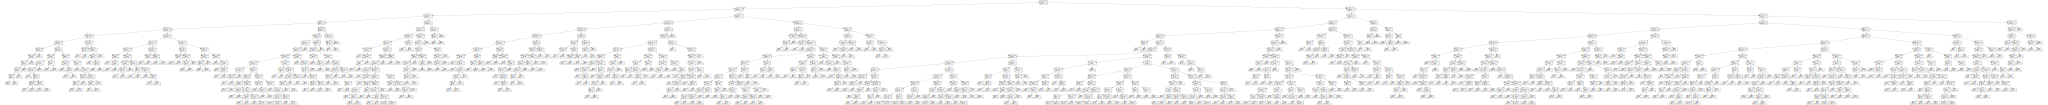

In [74]:
graphviz.Source(new_tree)

As we can see It doesn't improve the fit.